In [2]:
# importing all modules needed

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# getting user data
df_user = pd.read_csv('u.data', sep='\t',names=['user_id','item_id','rating','timestamp'])

In [27]:
# getting movie related data
df_items = pd.read_csv('u.item',sep='|',names=['item_id','item_title','release_date','video_release_date',
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Children', 'Comedy' , 'Crime', 'Documentary' ,'Drama', 'Fantasy' ,
              'Film-Noir' ,'Horror' , 'Musical' , 'Mystery', 'Romance', 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western' ],encoding='latin-1')

In [28]:
#keeping neccessary items only
df_items = df_items[['item_id','item_title']]

In [29]:
# joining the dataset to see the movie names
df_new = df_user.merge(df_items, on='item_id', how='left')

In [33]:
df_new = df_new[['user_id','item_id','rating','item_title']]

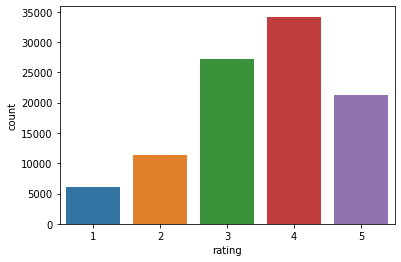

In [36]:
sns.countplot(df_new['rating'])

In [38]:
df_new.describe()

,user_id,item_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [42]:
# mean rating for each movie
ratings  = pd.DataFrame(df_new.groupby('item_title')['rating'].mean())

In [43]:
ratings

,rating
item_title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [44]:
# count of ratings for each movie

ratings['number_of_rating'] = df_new.groupby('item_title')['rating'].count()

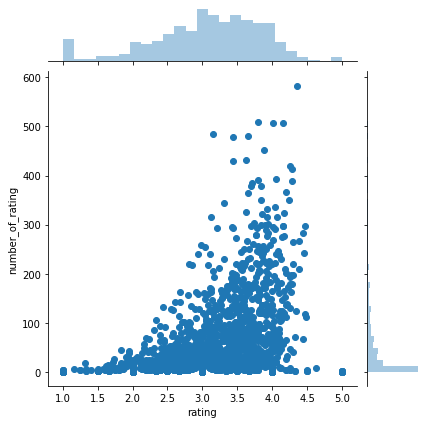

In [47]:
sns.jointplot(x='rating',y='number_of_rating',data=ratings)

In [54]:
# convert into pivot table

movie_matrix  = df_new.pivot_table(index='user_id',columns='item_title',values='rating',fill_value=0).reset_index()

In [56]:
movie_matrix.to_csv('movie_matrix.csv',index=None)
movie_matrix = pd.read_csv('movie_matrix.csv',index_col=None)

In [57]:
movie_matrix

,user_id,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
0,1,0,0,2,5,0,0,3,4,0,...,0,0,0,5,3,0,0,0,4,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,2,0,0,0,0,4,0,...,0,0,0,4,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
939,940,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,941,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
941,942,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
